In [2]:
#импорт необходимых библиотек

import numpy as np
import pandas as pd
import os
import time
import datetime

from tqdm.autonotebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from tslearn.clustering import TimeSeriesKMeans, silhouette_score

/var/folders/rh/7rjcc_rs68n6wjb41vhqg3dh0000gn/T/ipykernel_12707/692463545.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
dfs = []

for f in os.listdir(r'/Users/kirill/Desktop/ESFutData/'):
    if f != '.DS_Store':
        lines = open(r'/Users/kirill/Desktop/ESFutData/'+f).readlines()
        df = pd.Series(lines).str.split(',', expand=True)
        df[0] = pd.to_datetime(df[0])
        df[1] = df[1].astype(float)
        df[2] = df[2].astype(float)
        df[3] = df[3].astype(float)
        df[4] = df[4].astype(float)
        df[5] = df[5].astype(float)

        dfs.append(df.set_index(0).groupby(pd.Grouper(freq='d')).mean())

In [4]:
itg_l = []

for i in range(len(dfs)):
    if len(dfs[i].dropna()) > 201:
        itg_l.append(dfs[i].dropna()[:201])

for i in range(len(itg_l)):
    itg_l[i] = (abs( itg_l[i][[1,2,3]].diff()[1:] / itg_l[i][[1,2,3]][1:]) ).reset_index(drop=True)
    
data = []
for i in range(len(itg_l)):
    data.append(np.array(itg_l[i]))
    
data = np.array(data)

In [7]:
pd.DataFrame(data[0])

,0,1,2
0,0.023723,0.023723,0.023723
1,0.038596,0.038596,0.038596
2,0.003061,0.003061,0.003061
3,0.008289,0.008289,0.008289
4,0.009866,0.009866,0.009866
...,...,...,...
195,0.003118,0.003116,0.003109
196,0.001972,0.001954,0.001988
197,0.000322,0.000309,0.000323
198,0.004680,0.004626,0.004735


In [180]:
#K-Means clustering 

from sklearn import preprocessing

def formatting_and_norm(dttm, norm=0):
    new_min = []
    min_max_scaler = preprocessing.MinMaxScaler()
    if norm == 1:
        for i in range(len(dttm)):
            coin = pd.DataFrame(dttm[i])
            coin.set_index([0], inplace=True)
            coin = coin.T[:-1]
            coin = np.array(coin)
            coin = min_max_scaler.fit_transform(coin)
            new_min.append(coin)
    else:
        for i in range(len(dttm)):
            coin = pd.DataFrame(dttm[i])
            coin.set_index([0], inplace=True)
            coin = coin.T[:-1]
            coin = np.array(coin)
            new_min.append(coin)
    return(np.array(new_min))

def clustr(dttm, k_range):
    silhouette = []
    distortions = []
    K = k_range
    
    appended = pd.DataFrame()
    for i in formatting_and_norm(dttm):
        appended = pd.concat([appended, pd.DataFrame(i)])
  

    for k in tqdm(K):
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(appended)
        distortions.append(kmeanModel.inertia_)
        silhouette.append(silhouette_score(appended, kmeanModel.labels_, metric="euclidean"))

    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax2 = ax1.twinx()
    ax1.plot(K, distortions, 'b-')
    ax2.plot(K, silhouette, 'r-')

    ax1.set_xlabel('# clusters')
    ax1.set_ylabel('Distortion', color='b')
    ax2.set_ylabel('Silhouette', color='r')
    plt.figure(figsize=(9,6))
    plt.show()


def clusters_show(dttm, n_clusters=3, form=1):
    ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", n_jobs=10, max_iter=10)
    ts_kmeans.fit(dttm)

    for cluster_number in range(n_clusters):
        plt.plot(ts_kmeans.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
    plt.title("Cluster centroids")
    plt.legend()
    plt.show()
    


  0%|          | 0/13 [00:00<?, ?it/s]

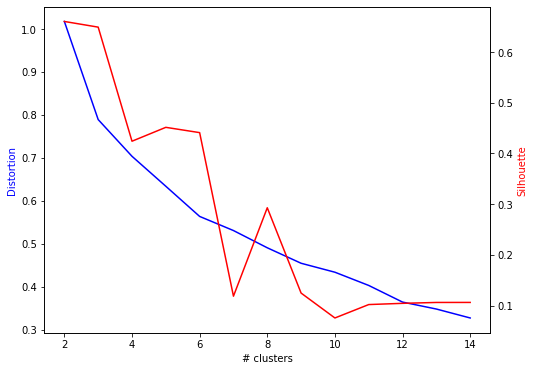

<Figure size 648x432 with 0 Axes>

In [182]:
clustr(data, range(2,15))

In [190]:
def DTW_cl(dt, n_clusters=3):
    ts_kmeans_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", n_jobs=6, max_iter=10)
    ts_kmeans_dtw.fit(dt)

    for cluster_number in range(n_clusters):
        plt.plot(ts_kmeans_dtw.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
    plt.title("Cluster centroids",  fontsize = 20)
    plt.legend()
    plt.figure(figsize=(9,6))
    plt.show()
    return(ts_kmeans_dtw.labels_)

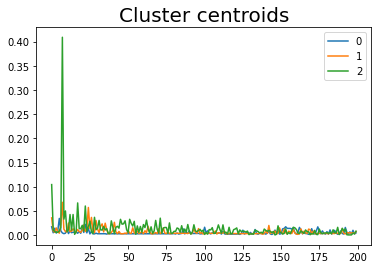

<Figure size 648x432 with 0 Axes>

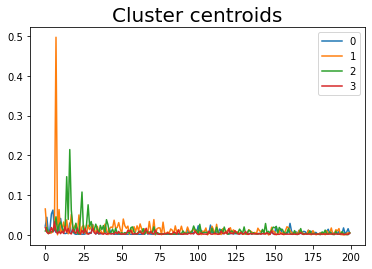

<Figure size 648x432 with 0 Axes>

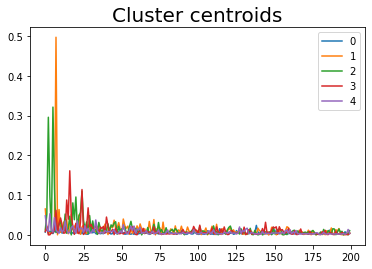

<Figure size 648x432 with 0 Axes>

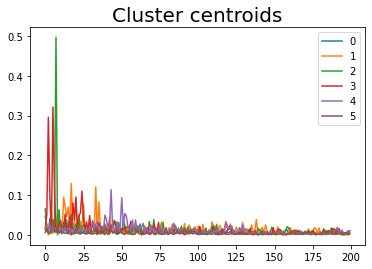

<Figure size 648x432 with 0 Axes>

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]),
 array([3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 2, 3, 3, 3, 3, 3, 2, 3, 0, 3, 0,
        1, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 2, 0, 0,
        0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3]),
 array([0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 3, 4, 4, 0, 0, 4, 3, 0, 4, 0, 0,
        1, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 2, 4, 0,
        4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 4, 0]),
 array([5, 5, 5, 5, 5, 0, 0, 5, 0, 4, 5, 1, 0, 0, 5, 5, 5, 4, 5, 0, 5, 0,
        2, 0, 4, 5, 5, 5, 5, 0, 5, 5, 5, 5, 0, 4, 0, 5, 0, 5, 5, 3, 0, 5,
        4, 0, 4, 5, 0, 0, 5, 5, 5, 5, 0, 5]))

In [195]:
DTW_cl(data, 3), DTW_cl(data, 4), DTW_cl(data, 5), DTW_cl(data, 6)

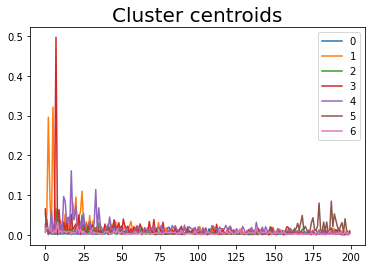

<Figure size 648x432 with 0 Axes>

In [196]:
x = DTW_cl(data, 7)

In [200]:
np.unique(x, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([10,  1, 13,  1,  2,  4, 25]))

In [221]:
#снова берем чистые данные
itg_l = []

for i in range(len(dfs)):
    if len(dfs[i].dropna()) > 201:
        itg_l.append(dfs[i].dropna()[:201])

for i in range(len(itg_l)):
    itg_l[i] = (( itg_l[i][[1,2,3]].shift()[1:] / itg_l[i][[1,2,3]][1:]) ).reset_index(drop=True)

#считаем для них R

r_i = pd.DataFrame()
r_m = pd.DataFrame()

for i in range(len(itg_l)):
    r_i[i] = np.log ( itg_l[i][1].shift() / itg_l[i][1] )

for i in range(len(itg_l)):
    r_m[i] = r_i[i].clip(lower=0).expanding().mean()
    
r_w = r_i - r_m

In [222]:
r_w

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,-0.002453,-0.003895,-0.004995,-0.008148,0.000000,-0.020858,-0.026704,-0.024496,0.000000,...,-0.069761,0.000000,0.000000,0.000000,0.000000,0.000000,-0.015345,-0.031808,0.000000,-0.012228
2,-0.067699,0.004863,-0.007409,-0.005317,0.028764,-0.073606,0.026175,0.001879,0.000909,-0.052300,...,-0.041433,-0.076026,0.013334,-0.028990,0.001125,-0.016122,-0.003182,0.010060,-0.080183,0.016366
3,-0.032255,-0.011580,0.022326,0.002461,-0.054464,-0.053883,0.009065,-0.005071,0.000640,-0.017370,...,0.037982,0.007450,-0.122011,-0.037311,-0.016174,-0.019402,0.003404,-0.003962,-0.082472,-0.050183
4,-0.002075,-0.000688,-0.046974,-0.003941,-0.013349,-0.028717,-0.031391,0.019098,-0.007161,-0.008654,...,-0.108677,-0.046718,-0.032618,-0.004723,0.000077,0.011725,-0.010977,-0.039725,0.014689,-0.009686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.006974,-0.004701,-0.003993,0.020692,-0.000195,-0.005005,-0.006042,-0.007017,0.012495,-0.031407,...,-0.023669,-0.003408,-0.009040,0.006671,-0.016365,-0.003534,-0.009743,-0.006017,-0.013653,-0.012099
196,-0.008898,-0.000677,-0.003843,-0.010171,-0.005683,-0.001266,-0.001659,-0.017731,-0.018445,-0.053245,...,0.063423,-0.006216,-0.006596,0.000497,-0.016634,-0.007816,0.001714,0.000113,-0.006599,-0.004977
197,-0.002146,-0.002881,-0.008802,-0.021804,-0.002622,-0.002402,-0.008976,0.008072,-0.022165,0.040289,...,-0.065125,0.001264,-0.015788,-0.011278,0.000725,-0.004162,-0.004611,-0.009215,-0.007513,-0.006826
198,0.001213,-0.001148,-0.003885,0.016580,-0.012512,-0.011663,0.002097,0.002424,0.018138,-0.011453,...,0.016383,-0.001416,-0.013437,-0.011832,0.000213,0.000127,-0.004986,-0.003441,-0.007666,-0.004980


In [226]:
#n_clusters = 7
#n_stocks = 56
x #cluster labels

array([6, 6, 6, 6, 6, 0, 0, 6, 0, 5, 2, 4, 0, 0, 6, 6, 2, 4, 6, 0, 6, 2,
       3, 0, 5, 2, 6, 6, 6, 2, 6, 6, 6, 6, 2, 2, 2, 6, 2, 6, 6, 1, 2, 2,
       5, 0, 5, 6, 2, 2, 6, 6, 6, 0, 0, 6])

In [249]:
A_matrix = []
for i in range(0,56):
    v = [0] * 7
    v[x[i]] = 1
    A_matrix.append(v)
    
A_matrix = pd.DataFrame(A_matrix)

In [250]:
pd.DataFrame( np.dot( np.linalg.inv(np.dot(A_matrix.T, A_matrix)) , A_matrix.T) ) 

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.00,0.00,0.00,0.00,0.00,0.1,0.1,0.00,0.1,0.00,...,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.1,0.1,0.00
1,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.00,0.00,0.076923,0.076923,0.00,0.00,0.00,0.0,0.0,0.00
3,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.00
5,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.25,...,0.25,0.00,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.00
6,0.04,0.04,0.04,0.04,0.04,0.0,0.0,0.04,0.0,0.00,...,0.00,0.04,0.000000,0.000000,0.04,0.04,0.04,0.0,0.0,0.04
